In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc 
from matplotlib import cm
import pandas as pd
from tqdm import tqdm
from scipy.integrate import dblquad
from scipy.integrate import quad

In [5]:
file = 'Gaussiana.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv'

data = pd.read_csv(url,sep=",",engine='python')
X = data.x


In [17]:
def Like_v(x, data):
    exponent = -0.5 * (x[0] - data) ** 2 / x[1] ** 2
    numerator = np.exp(exponent)
    denominator = np.sqrt(2 * np.pi * x[1] ** 2)
    return numerator / denominator
def Tr_ms(x):
    return [np.random.normal(x[0], 0.5, (1,)), np.random.normal(x[1], 0.5, (1,))]

In [18]:
def Op(x):
    if 3. <= x[0] <= 5. and 0.5 <= x[1] <= 3.5:
        return 1
    else:
        return 0

In [19]:
def Like_v(x, data):
    exponent = -0.5 * (x[0] - data) ** 2 / x[1] ** 2
    numerator = np.exp(exponent)
    denominator = np.sqrt(2 * np.pi * x[1] ** 2)
    return numerator / denominator

In [26]:
def is_greater(x, x_new):
    return x_new > x

def acceptance(x, x_new):
    return is_greater(x, x_new) or np.random.uniform(0, 1) < np.exp(x_new - x)

In [27]:
def initialize_accepted_array(It_):
    return np.zeros((It_, 2))

def generate_accepted_samples(accepted, index, x):
    accepted[index] = x
    return accepted, index + 1

  0%|          | 0/20000 [00:00<?, ?it/s]<ipython-input-31-c66e53cf240a>:10: RuntimeWarning: divide by zero encountered in log
  if acceptance(x_lik + np.log(Op(x)), x_new_lik + np.log(Op(x_new))):
<ipython-input-26-78d242fe19f0>:9: RuntimeWarning: invalid value encountered in double_scalars
  return is_greater(x, x_new) or np.random.uniform(0, 1) < np.exp(x_new - x)
  5%|▍         | 997/20000 [00:03<01:15, 250.67it/s]<ipython-input-27-e9268723b2ba>:5: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  accepted[index] = x
 19%|█▊        | 3703/20000 [00:11<00:27, 590.22it/s]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|█

(array([0.03185085, 0.09555256, 0.06370171, 0.13802037, 0.26542378,
        0.20172208, 0.14863732, 0.08493561, 0.0212339 , 0.01061695]),
 array([-0.3806526 ,  0.56123737,  1.50312733,  2.4450173 ,  3.38690727,
         4.32879724,  5.2706872 ,  6.21257717,  7.15446714,  8.0963571 ,
         9.03824707]),
 <BarContainer object of 10 artists>)

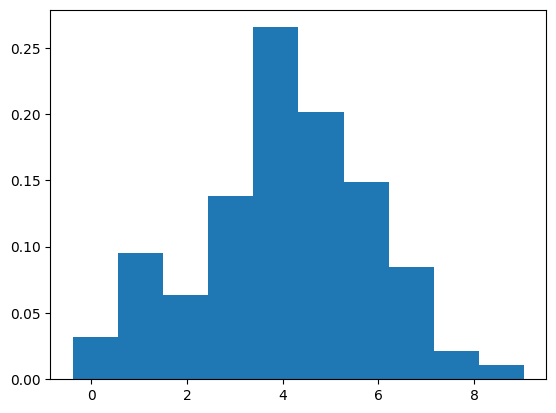

In [31]:
def metropolis_hastings(Like_v_computer, Op, Tr_ms, param_init, It_, data, acceptance):
    x = param_init
    accepted = initialize_accepted_array(It_)
    index = 0
    for i in tqdm(range(It_)):
        x_new = Tr_ms(x)
        x_lik = Like_v_computer(x, data)
        x_new_lik = Like_v_computer(x_new, data)
        
        if acceptance(x_lik + np.log(Op(x)), x_new_lik + np.log(Op(x_new))):
            x = x_new
        
        if i >= 1000:
            accepted, index = generate_accepted_samples(accepted, index, x)
    
    return accepted[index:, :]

def Log_Like_v(x, data):
    Like_v_values = Like_v(x, data)
    log_Like_v_values = np.log(Like_v_values)
    return np.sum(log_Like_v_values)

accepted = metropolis_hastings(Log_Like_v,Op,Tr_ms,[2,3], 20000,X,acceptance)
_x = np.linspace(np.min(X),np.max(X),100)
plt.hist(X,density=True)